In [29]:
#Math stuff
from numpy.random import seed
from numpy.random import randn
from scipy import stats
import numpy as np
import math  

#Visualization stuff
import seaborn as sns
#sns.set(style="darkgrid")
sns.set(style="whitegrid")
from matplotlib import pyplot as plt

import pandas as pd
import os

#ML stuff
from sklearn import preprocessing

In [30]:
#check list of files in data 
directory = "./data/summary/dedicated_host/"
print(os.listdir(directory))

['m5d_pgbench_dedicated_host_11-16-2019.csv-Summary.csv', 'm5d_sysbench_dedicated_host_11-16-2019_us-east-1b - Sheet1.csv-Summary.csv', 'm5d_iperf_dedicated_host_11-17.csv-Summary.csv', 'm5d_y-cruncher_dedicated_host_11-16-2019_us-east-1 - Sheet1.csv-Summary.csv', 'Aggregate_Summary_Dedicated_Host_11-16-2019 - Sheet2.csv']


In [31]:
#import each summary data
data_name = 'Aggregate_Summary_Dedicated_Host_11-16-2019 - Sheet2.csv'

In [32]:
#add csvs to data frames
df_agg = pd.read_csv(directory + data_name, header = 0)

In [33]:
df_agg.head()

,instanceID,setId,tenants,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,instanceID.1,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal
0,i-0009b7735dea24732,0,48,9.046352,0.006011,6.526652,0.064484,123377.0000,269.838841,i-0009b7735dea24732,612.8,566.3,1179.1,253.291575,160.911328,341.710225
1,i-002f7e27ea3e0bc1c,0,48,9.043485,0.005964,6.532571,0.044366,123286.0000,553.898908,i-002f7e27ea3e0bc1c,518.3,556.9,1075.2,188.317138,184.650090,273.639585
2,i-007e12c9530b8cdea,0,48,9.525164,0.693472,6.523446,0.064272,122657.6667,572.732340,i-007e12c9530b8cdea,371.3,486.5,857.8,143.431013,136.416234,236.250244
3,i-008e6f72c7403b5d3,0,48,9.041284,0.004991,6.487584,0.065375,123779.6667,193.717148,i-008e6f72c7403b5d3,594.9,482.1,1077.0,178.835399,75.426859,231.176219
4,i-00ba7a56c944e5a25,0,48,9.042799,0.005881,6.568983,0.087642,123144.0000,246.032518,i-00ba7a56c944e5a25,859.6,762.3,1621.9,369.176621,400.885146,720.323916


In [34]:
df_agg.drop(columns = ['instanceID','instanceID.1','setId'], inplace=True)

In [35]:
#group by tenants and take average
df = df_agg.groupby('tenants').mean()

In [36]:
df

,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal
tenants,,,,,,,,,,,,
1,7.173863,0.002781,4.441481,0.039923,179145.333300,520.497198,4970.000000,4745.000000,9715.000000,0.000000,321.601893,321.601893
2,7.176439,0.004805,4.497907,0.013084,180675.000000,1164.334396,4970.000000,4882.000000,9852.000000,0.000000,121.203625,121.203625
3,7.568770,0.004481,4.475998,0.050332,172304.222200,185.429822,4970.000000,4843.333333,9813.333333,0.000000,307.224503,307.224503
4,7.568645,0.003691,4.643859,0.035991,174785.583325,215.980395,4968.500000,4849.000000,9817.500000,4.743416,253.151631,253.567952
5,7.781149,0.004360,4.621565,0.047322,176469.600020,219.544020,4497.160000,3971.280000,8468.440000,432.897239,1016.849987,1148.969173
6,7.813378,0.045979,4.653088,0.023970,175958.722217,207.884763,3960.166667,3249.166667,7209.333333,372.127563,963.965824,1179.175203
7,7.780429,0.004352,4.746376,0.047975,173131.904771,257.873714,3494.657143,2942.985714,6437.642857,251.134147,1017.065421,1039.925621
8,7.781238,0.005323,4.750794,0.030629,172668.875000,336.118945,3069.200000,2629.812500,5699.012500,195.595563,921.195761,1003.291342
9,7.713974,0.003812,4.823457,0.039025,169857.333333,277.936759,2728.333333,2286.611111,5014.944444,347.525549,921.102136,1029.529436


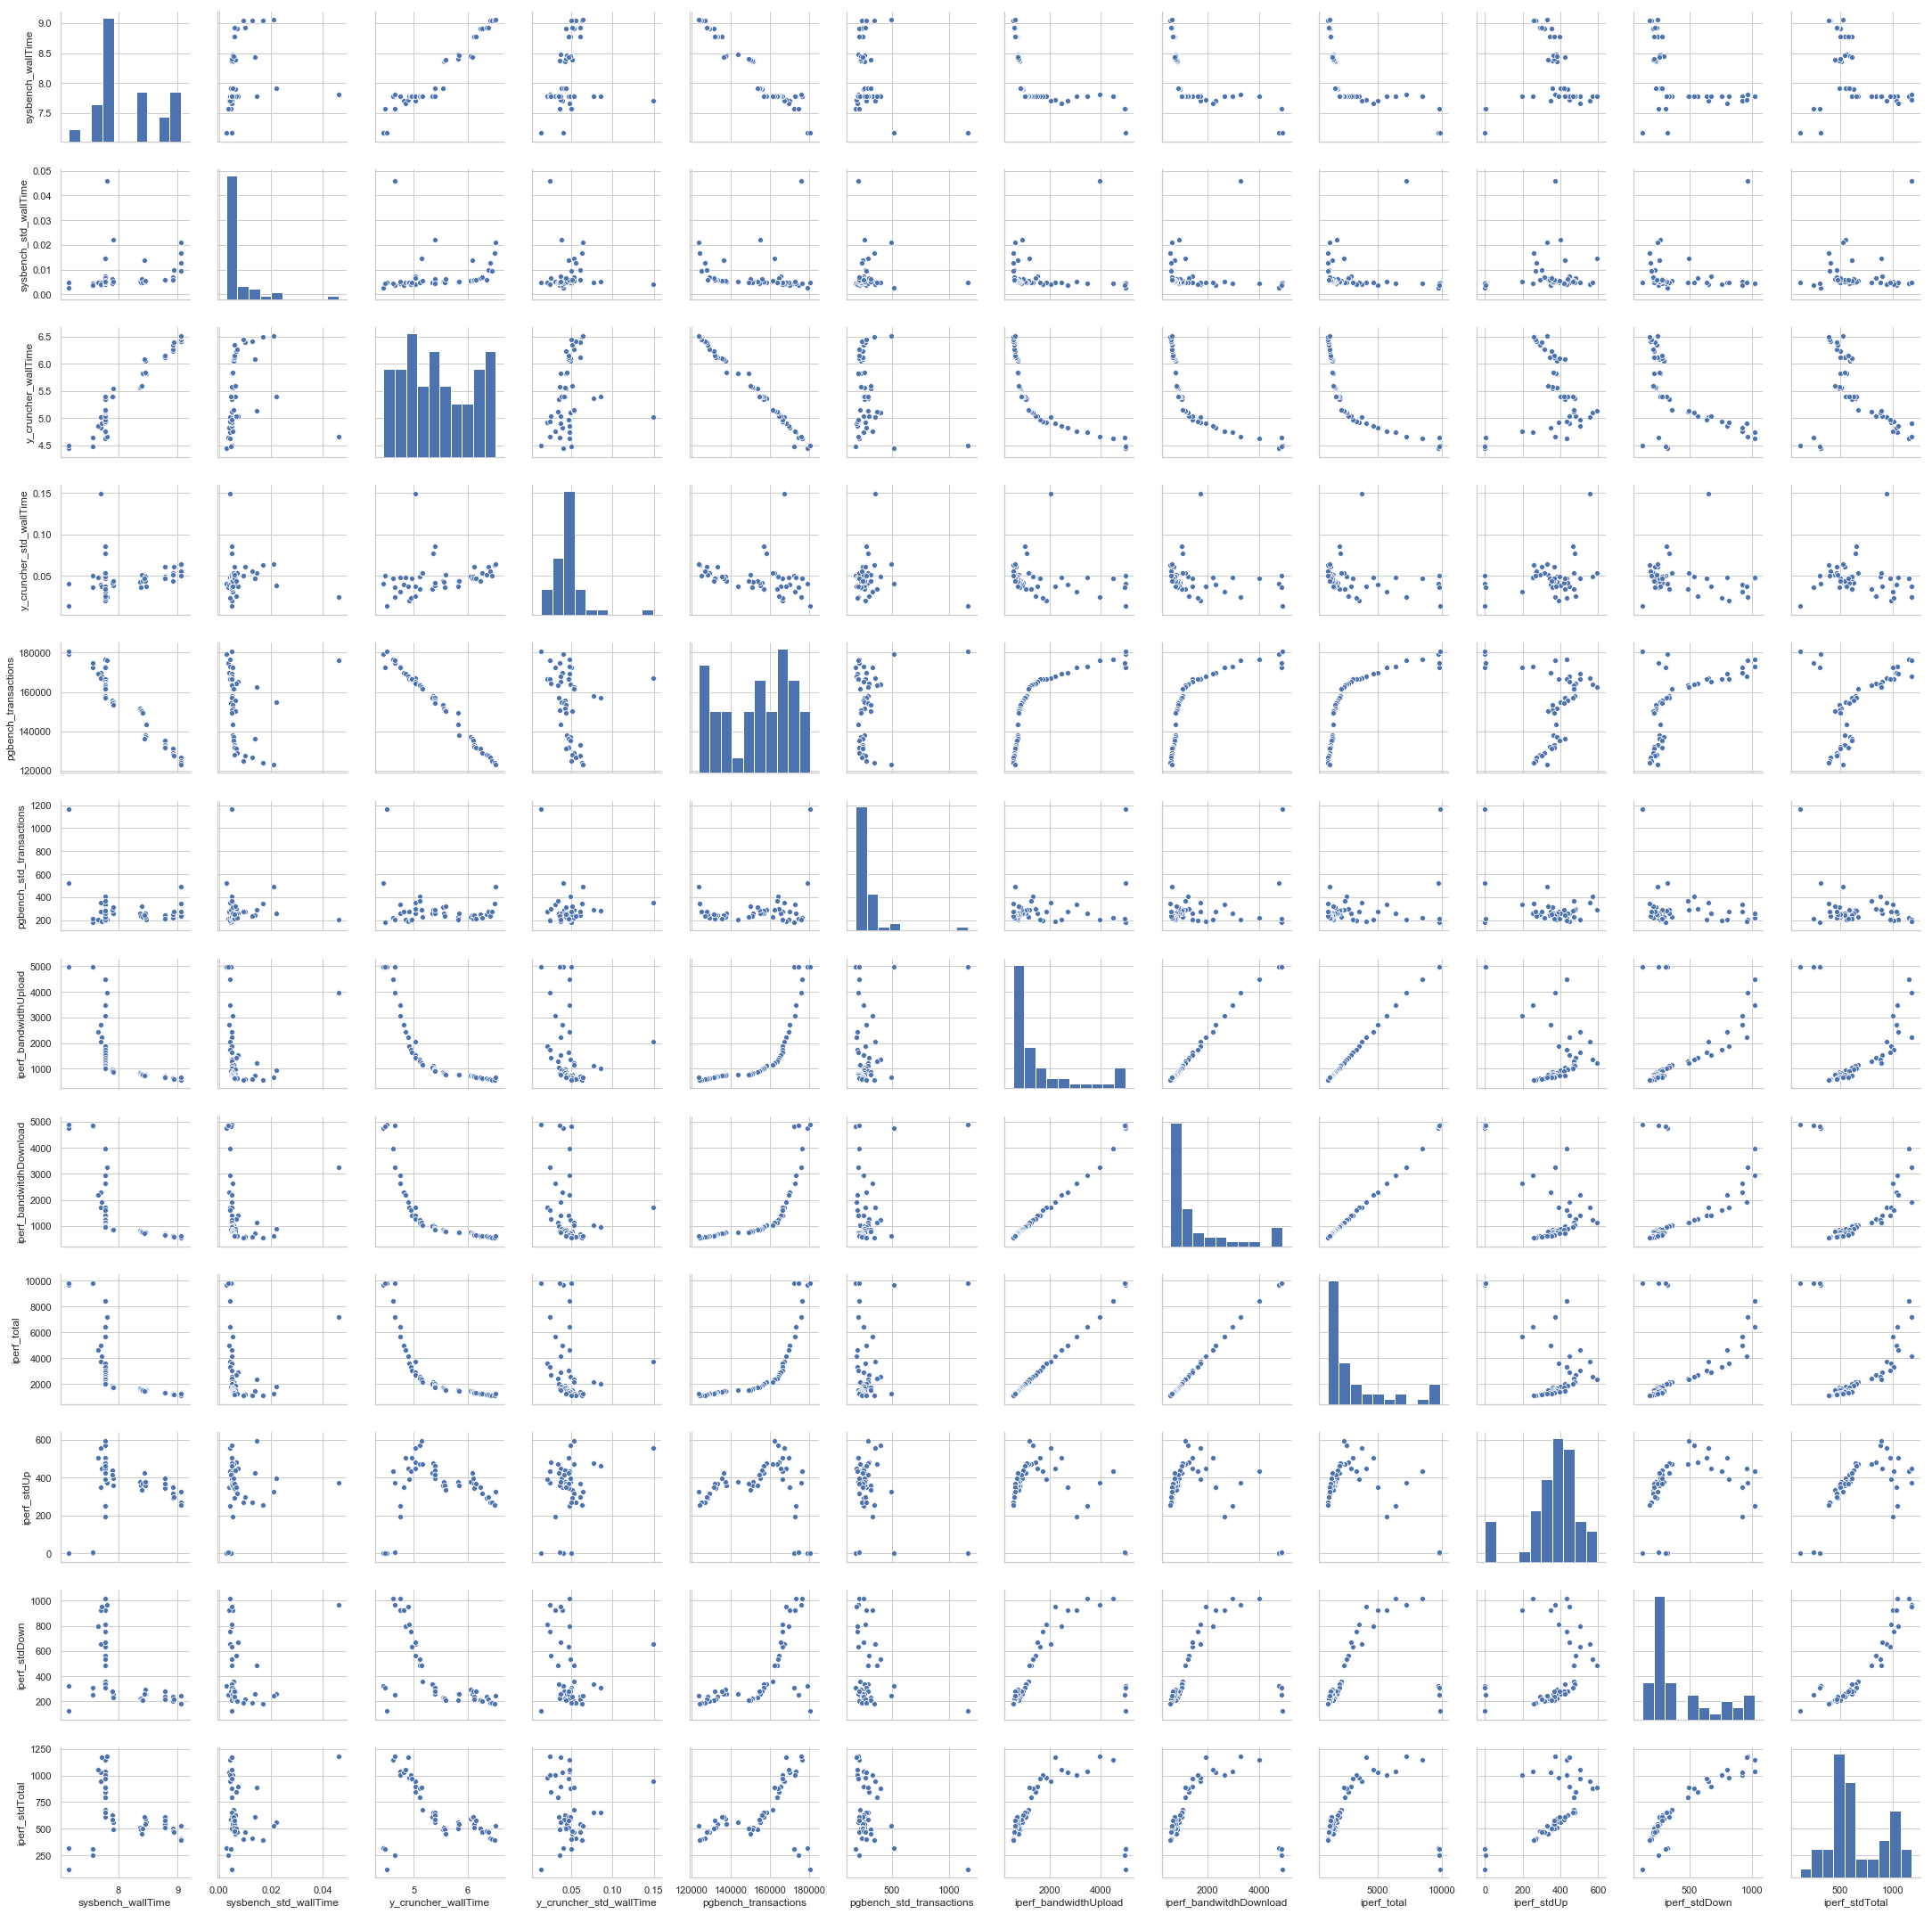

In [37]:
sns.pairplot(df)
plt.show()

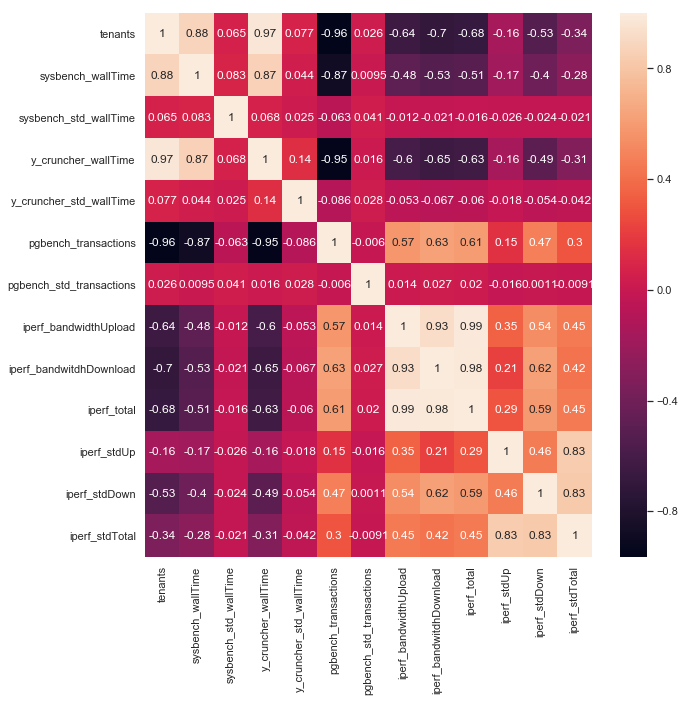

In [38]:
#heatmap of agg
plt.figure(figsize=(10,10))
sns.heatmap(df_agg.corr(), annot=True)
plt.show()

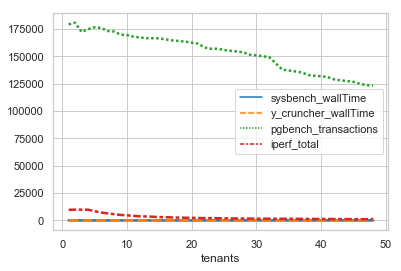

In [39]:
#tenants vs metric plot
data_plot = df[['sysbench_wallTime', 'y_cruncher_wallTime', 'pgbench_transactions', 'iperf_total']]
sns.lineplot(data=data_plot, palette="tab10", linewidth=2.5)
plt.show()

<h3>this graph doesn't tell us much. I think we need to normalize the data first</h3>

In [40]:
#we need to normalize the relevant columns
min_max_scaler = preprocessing.MinMaxScaler()
df_normalized = pd.DataFrame(min_max_scaler.fit_transform(df), columns=df.columns, index=df.index)

In [41]:
df_normalized.head()

,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal
tenants,,,,,,,,,,,,
1,0.000000,0.000000,0.000000,0.197255,0.973377,0.342288,1.000000,0.968368,0.984314,0.000000,0.223693,0.189417
2,0.001370,0.046838,0.027153,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
3,0.210072,0.039338,0.016610,0.273760,0.854313,0.000000,1.000000,0.991072,0.995573,0.000000,0.207645,0.175828
4,0.210006,0.021057,0.097388,0.168358,0.897499,0.031209,0.999659,0.992381,0.996050,0.007980,0.147286,0.125111
5,0.323048,0.036549,0.086660,0.251643,0.926808,0.034849,0.892599,0.789725,0.841583,0.728274,0.999760,0.971449


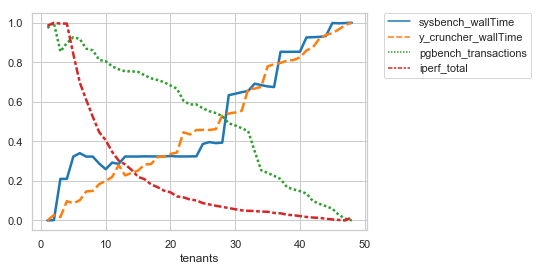

In [42]:
#now with normalized df, let's try plotting again
data_plot = df_normalized[['sysbench_wallTime', 'y_cruncher_wallTime', 'pgbench_transactions', 'iperf_total']]

sns.lineplot(data=data_plot, palette="tab10", linewidth=2.5)
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.show()

<h3>This normalized data looks great! Every experiment type besides iperf looks very linear, almost would be too easy for a ML algorithm to predict the tenancy...</h3>

<h2>Modeling</h2>

In [43]:
#do a random forest and/or linear regression on the 1176 data
df_agg.head()

,tenants,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal
0,48,9.046352,0.006011,6.526652,0.064484,123377.0000,269.838841,612.8,566.3,1179.1,253.291575,160.911328,341.710225
1,48,9.043485,0.005964,6.532571,0.044366,123286.0000,553.898908,518.3,556.9,1075.2,188.317138,184.650090,273.639585
2,48,9.525164,0.693472,6.523446,0.064272,122657.6667,572.732340,371.3,486.5,857.8,143.431013,136.416234,236.250244
3,48,9.041284,0.004991,6.487584,0.065375,123779.6667,193.717148,594.9,482.1,1077.0,178.835399,75.426859,231.176219
4,48,9.042799,0.005881,6.568983,0.087642,123144.0000,246.032518,859.6,762.3,1621.9,369.176621,400.885146,720.323916


In [83]:
#import ML dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn import metrics

from sklearn.preprocessing import scale

from sklearn.datasets import load_wine
from sklearn.pipeline import make_pipeline

from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score

from sklearn.tree import export_graphviz

In [81]:
#method to run simple model and outputs confusion matrix, calssification report, and f1-score
def get_model_result(X, y, model = LinearRegression(), test_size = 0.3):
    '''prints the confusion matrix and classification report and returns fitted model and X, y values'''
    
    X_train, X_test, y_train, y_test = train_test_split(X, 
                                                        y,
                                                        test_size = test_size,
                                                        random_state = 19,
                                                        #stratify = y
                                                      )

    model_name = RandomForestRegressor
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    print(model_name)
    if (model == LinearRegression):
        print('Coefficients: \n', model.coef_)
    elif (model_name == RandomForestRegressor):
        print('test')
        printTree(model, X_train, y_train, X, y)
        print('Feature importances: \n',model.feature_importances_)
        
    # The mean squared error
    print("Mean squared error: %.2f" % mean_squared_error(y_test, y_pred))

    # Explained variance score: 1 is perfect prediction
    print('Variance score (r2 score): %.2f' % r2_score(y_test, y_pred))
    
    #return X_train, X_test, y_train, y_test, model

In [84]:
def printTree(model, X_train, y_train, X, y):

    model.fit(X_train, y_train)
    # Extract single tree
    estimator = model.estimators_[5]

    
    # Export as dot file
    export_graphviz(estimator, out_file='tree.dot', 
                    feature_names = X,
                    class_names = y,
                    rounded = True, proportion = False, 
                    precision = 2, filled = True)

    # Convert to png using system command (requires Graphviz)
    from subprocess import call
    call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

    # Display in jupyter notebook
    from IPython.display import Image
    Image(filename = 'tree.png')

In [46]:
#method return x and y(setId) for models
def splitDfIntoXY(df, df_y_name):
    y = df[df_y_name].values
    x = df.drop(columns=[df_y_name])
    return x, y

In [47]:
#create x and y for model
x, y = splitDfIntoXY(df_agg, 'tenants')

In [48]:
#normalize x
x_normalized = pd.DataFrame(min_max_scaler.fit_transform(x), columns=x.columns, index=x.index)

In [49]:
x_normalized.head()

,sysbench_wallTime,sysbench_std_wallTime,y_cruncher_wallTime,y_cruncher_std_wallTime,pgbench_transactions,pgbench_std_transactions,iperf_bandwidthUpload,iperf_bandwitdhDownload,iperf_total,iperf_stdUp,iperf_stdDown,iperf_stdTotal
0,0.796385,0.005319,0.960783,0.162563,0.129397,0.128462,0.062706,0.031660,0.040107,0.128391,0.088724,0.114678
1,0.795166,0.005251,0.963424,0.108777,0.128052,0.265750,0.042377,0.029579,0.028684,0.095456,0.103738,0.088130
2,1.000000,1.000000,0.959353,0.161994,0.118760,0.274852,0.010756,0.013993,0.004782,0.072704,0.073232,0.073547
3,0.794230,0.003842,0.943351,0.164944,0.135352,0.091672,0.058855,0.013018,0.028882,0.090650,0.034658,0.071568
4,0.794874,0.005131,0.979672,0.224474,0.125952,0.116956,0.115796,0.075055,0.088789,0.187131,0.240502,0.262344


In [59]:
col = ['iperf_total', 'y_cruncher_wallTime', 'pgbench_transactions','sysbench_wallTime']

In [64]:
#use only the most relevant columns...
x_test = x_normalized[col]

In [73]:
#linear regression model
get_model_result(x_test,y, model = LinearRegression())

Mean squared error: 4.77
Variance score (r2 score): 0.96


In [85]:
#random forest regression model
get_model_result(x_test,y, model = RandomForestRegressor())

<class 'sklearn.ensemble.forest.RandomForestRegressor'>
test


/Users/dell/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


ValueError: Length of feature_names, 1176 does not match number of features, 4

<h2>Test on data from other dedicated host runs</h2>

In [54]:
print(os.listdir('./data/'))

['open_cloud', 'newdata_iperf_m5d_48 - newdata_iperf_m5d_48.csv', 'ycruncher_m5d_aug13_48-instances - ycruncher_m5d_aug13.csv', '.DS_Store', 'm5d-no-idle-dedicated-host-11-07-2019 - newdata.csv', 'm5d_48vms_pgbench_2ndtry - m5d_48vms_pgbench_2ndtry.csv', 'm5d-y-cruncher-idle-mode-10-27-2019 - m5d-ycruncher-p-10-27-2019.csv-Summary.csv', 'm5d-sysbench-dedicated-host-10-24-2019 - m5d-sysbench-dedicated-host-10-24-2019.csv', 'm5d-no-idle-dedicated-host-11-07-2019 - newdata.csv-Summary.csv', 'y_cruncher_08_22_2019 - y_cruncher_08_22_2019.csv', 'dedicated_host', 'm5d_48vms_pgbench_no_idle_11_11_2019 - Sheet1.csv', 'm5d-y-cruncher-idle-mode-10-27-2019 - m5d-ycruncher-p-10-27-2019.csv', 'summary']


In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators=10)

# Train
model.fit(iris.data, iris.target)
# Extract single tree
estimator = model.estimators_[5]

from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(estimator, out_file='tree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree.png')